<a href="https://colab.research.google.com/github/zsenof/Hackathon_Analyse_revenu_foyer/blob/main/Nettoyage_analyse_donnees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regression Dataset for Household Income Analysis**


[link](https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis)
Synthetic Dataset for Understanding Factors Influencing Annual Household Income

In [ ]:
#exporter le dataset en format csv depuis ce lien https://www.kaggle.com/datasets/stealthtechnologies/regression-dataset-for-household-income-analysis

In [1]:
import pandas as pd

In [2]:
link = '/content/data.csv'

In [3]:
data= pd.read_csv(link)
data

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


#EDA

**Phase EDA (Exploration des données)**

Pour mieux comprendre la structure et les caractéristiques des données, Cela inclut :


Résumé des données :

	•	Dimensions des données (nombre de lignes et colonnes).
	•	Types des variables (numériques, catégoriques, etc.).

Détection des problèmes :

	•	Valeurs manquantes, doublons.
	•	Outliers (valeurs aberrantes).

Statistiques descriptives :

	•	Moyenne, médiane, écart-type.
	•	Distribution des variables (avec des histogrammes ou des boxplots)

Visualisation des relations :

	•	Relations entre les variables (scatterplots, heatmaps de corrélation)

In [4]:
data.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [5]:
data.sample()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
5582,25,High School,Finance,4,Urban,20,Married,Self-employed,5,Own,Apartment,Male,Biking,74322


In [6]:
data.shape

(10000, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

In [8]:
data.isna().sum()

#il n'ya a pas de valeurs nulles

,0
Age,0
Education_Level,0
Occupation,0
Number_of_Dependents,0
Location,0
Work_Experience,0
Marital_Status,0
Employment_Status,0
Household_Size,0
Homeownership_Status,0


In [9]:
data.duplicated().sum()
# pas de doubon dans le dataset

0

In [10]:
data.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

In [11]:
import pandas as pd	# Manipulation des jeux de données sous forme de tableaux.(DataFrame).
import numpy as np    # pour effectuer des calculs rapides et travailler avec des tableaux/matrices.
import matplotlib.pyplot as plt  # Création de graphiques statiques (histogrammes, courbes,...)
import seaborn as sns    # Visu avancée des données basée sur Matplotlib, adaptée pour des graph statistiques.


<ipython-input-12-62053ccccaaa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x= cols, ax = ax[index], palette="viridis")
<ipython-input-12-62053ccccaaa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x= cols, ax = ax[index], palette="viridis")
<ipython-input-12-62053ccccaaa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= data, x= cols, ax = ax[index], palette="viridis")
<ipython-input-12-62053ccccaaa>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in

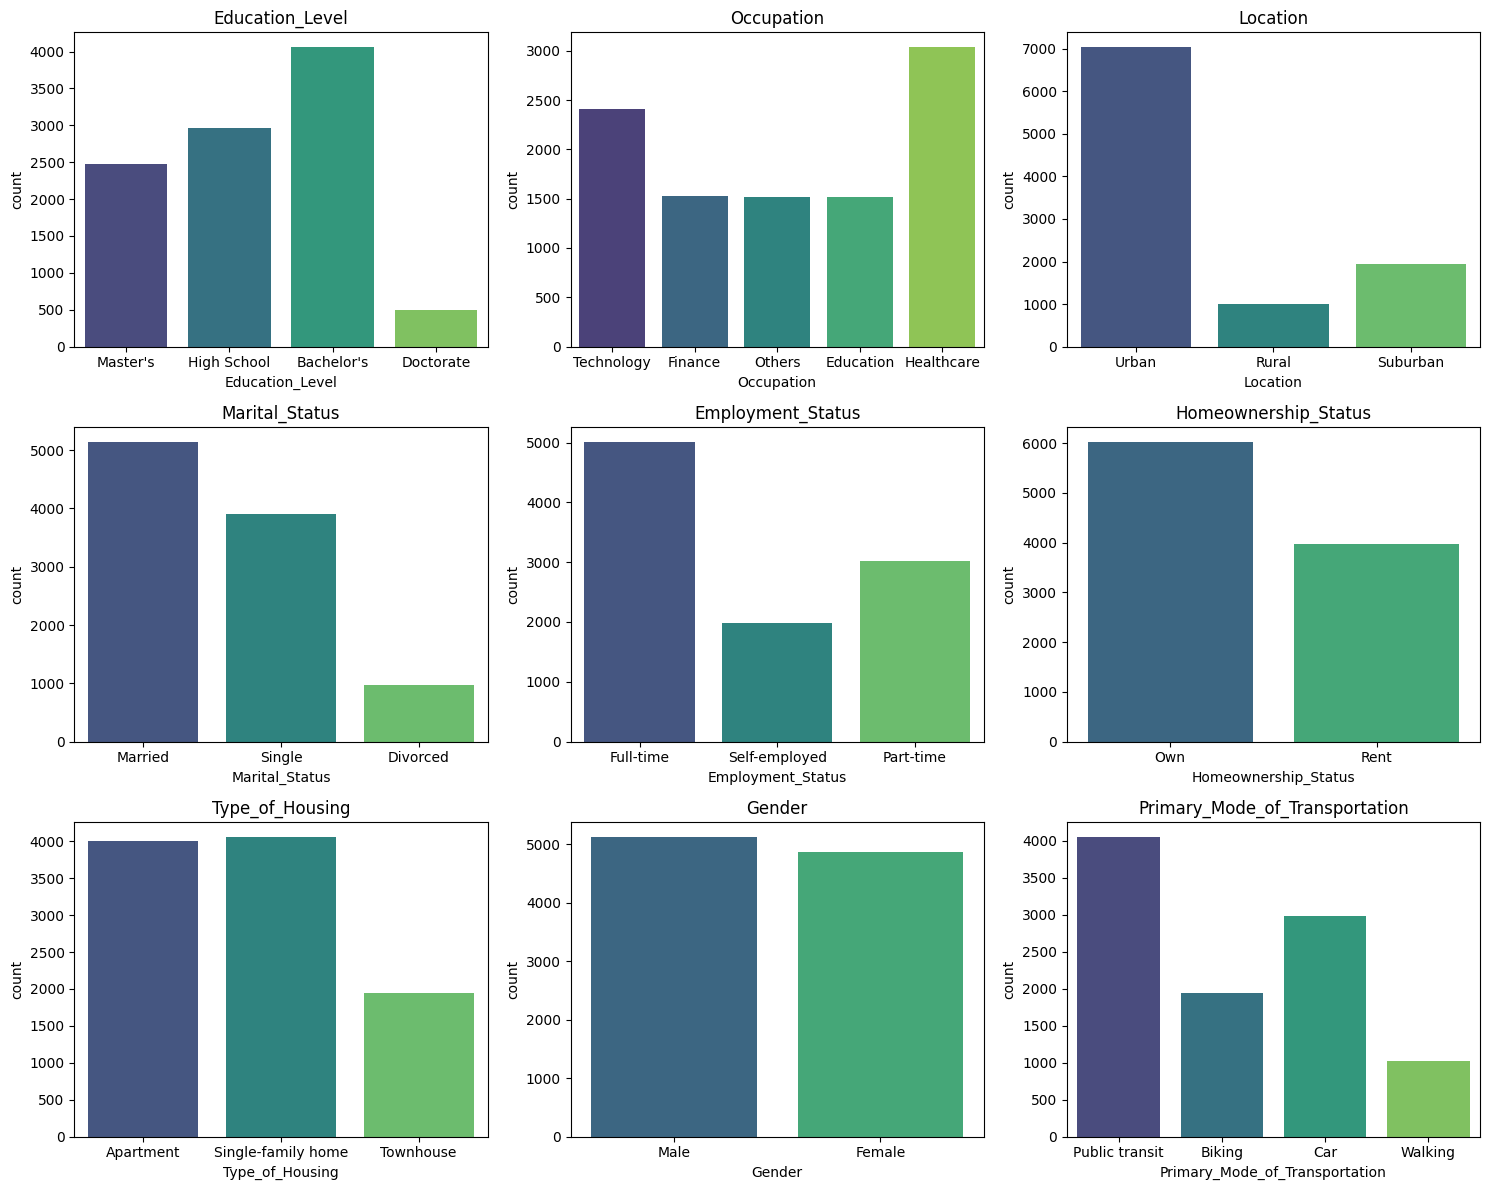

In [12]:
cat_cols = data.select_dtypes("object").columns
#colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22"]  # Exemple de couleurs personnalisées
#viridis , coolwarm , muted

f, ax = plt.subplots(3,3 , figsize=(15, 12))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(data= data, x= cols, ax = ax[index], palette="viridis")
    ax[index].set_title(cols)

plt.tight_layout()  # Ajuste les espacements entre les graphiques
plt.show()

In [13]:
#statistiques
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,44.0217,1.520400e+01,18.0,31.0,44.0,57.0,70.0
Number_of_Dependents,10000.0,2.5270,1.713991e+00,0.0,1.0,3.0,4.0,5.0
Work_Experience,10000.0,24.8588,1.465262e+01,0.0,12.0,25.0,37.0,50.0
Household_Size,10000.0,3.9896,2.010496e+00,1.0,2.0,4.0,6.0,7.0
Income,10000.0,816838.1667,1.821089e+06,31044.0,68446.0,72943.0,350667.5,9992571.0


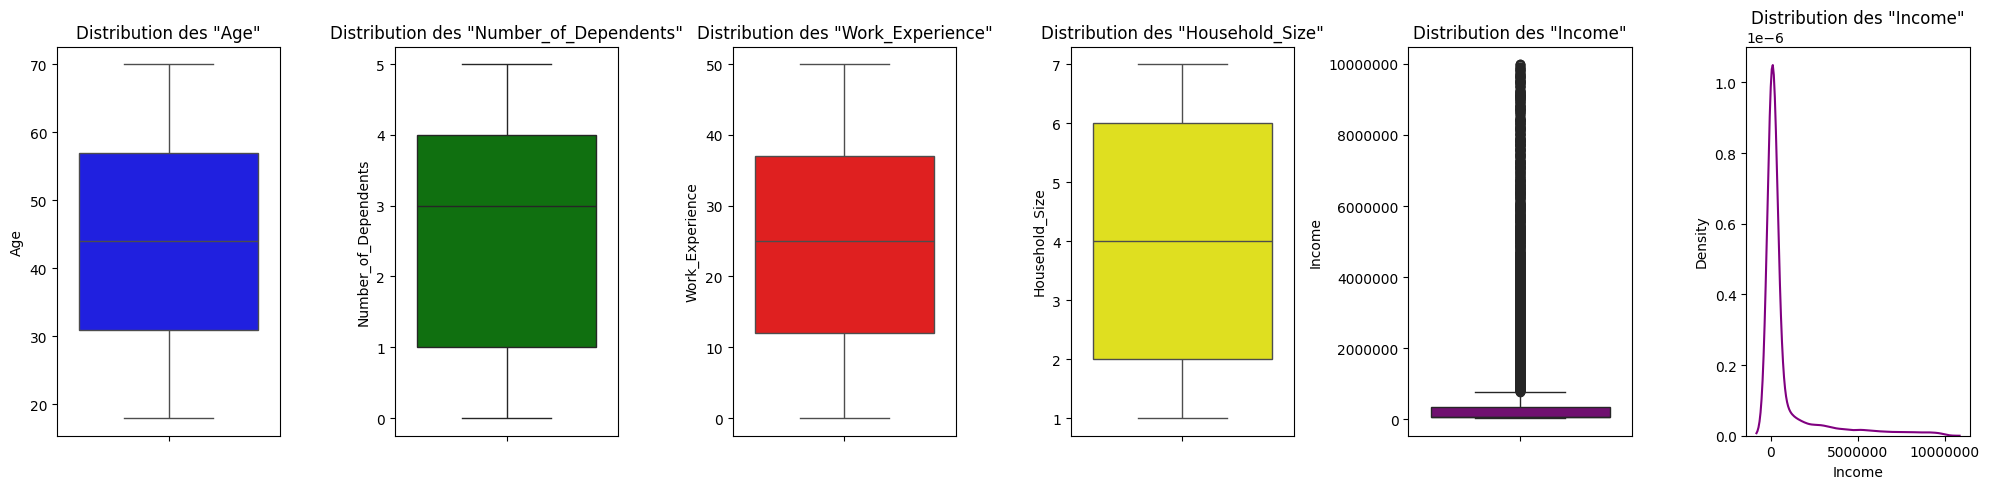

In [14]:
#recherche valeurs aberrantes
#On crée 3 boxplots (une pour chaque variable)


fig, axs = plt.subplots(1, 6, figsize=(20, 5))  # Définit la taille de la figure


# Boxplot pour "Age"
sns.boxplot(y=data['Age'], ax=axs[0], color='blue')
axs[0].set_title('Distribution des "Age"')

# Boxplot pour "Number_of_Dependents"
sns.boxplot(y=data['Number_of_Dependents'], ax=axs[1], color='green')
axs[1].set_title('Distribution des "Number_of_Dependents"')

# Boxplot pour "Work_Experience"
sns.boxplot(y=data['Work_Experience'], ax=axs[2], color='red')
axs[2].set_title('Distribution des "Work_Experience"')

# Boxplot pour "Household_Size"
sns.boxplot(y=data['Household_Size'], ax=axs[3], color='yellow')
axs[3].set_title('Distribution des "Household_Size"')

# Boxplot pour "Income"
sns.boxplot(y=data['Income'], ax=axs[4], color='purple')
axs[4].set_title('Distribution des "Income"')
axs[4].ticklabel_format(style='plain', axis='y')  # Applique le format sur l'axe vertical

# kdeplot pour "Income"
sns.kdeplot(x=data['Income'], ax=axs[5], color='purple')
axs[5].set_title('Distribution des "Income"')
axs[5].ticklabel_format(style='plain', axis='x')

plt.tight_layout()  # Ajuste les espacements entre les graphiques
plt.show()


Commentaires :

**1) les âges** :  la distribution des âges est concentrée principalement entre environ 30 et 60 ans avec une médiane autour de 44 ans, ce qui signifie qu'il y a autant d'individus de moins de 44 ans que de plus de 44 ans.
Il n'y a pas de valeurs aberrantes (outliers) détectées.
=> La distribution des âges semble équilibrée et concentrée autour de la quarantaine.

**2) Number_of_Dependenst** : la distribution des valeurs est entre 1 et 4 personnes à charge avec une concentration autour de 3, ce qui représente la valeur médiane. Pas de valeurs aberrantes.

**3) Word_Experience** : la majorité des individus ont entre 10 et 40 ans d'expérience. Aucun outliers n'a été détecté.
=> les individus ont généralement une expérience professionnelle significative en effet, 75% des individus ont entre 12 et 37 ans d'expérience.

**4) Household_size** :la taille des foyers est majoritairement centrée autour de 4 membres. Pas de valeurs aberrante détectées.
=> 75% des foyers sont comptent entre 2 et 6 membres.

**5) Income** : il y a une grande dispersion des revenus, la distribution des valeurs est comprise entre environ 68 000 et 350 000$.
Plusieurs outliers sont présents, indiquant la présence de revenus exceptionnellement élevés.
=> La disparité des revenus suggère l’existence de groupes socio-économiques distincts, potentiellement liés à des facteurs sectoriels ou géographiques à explorer.


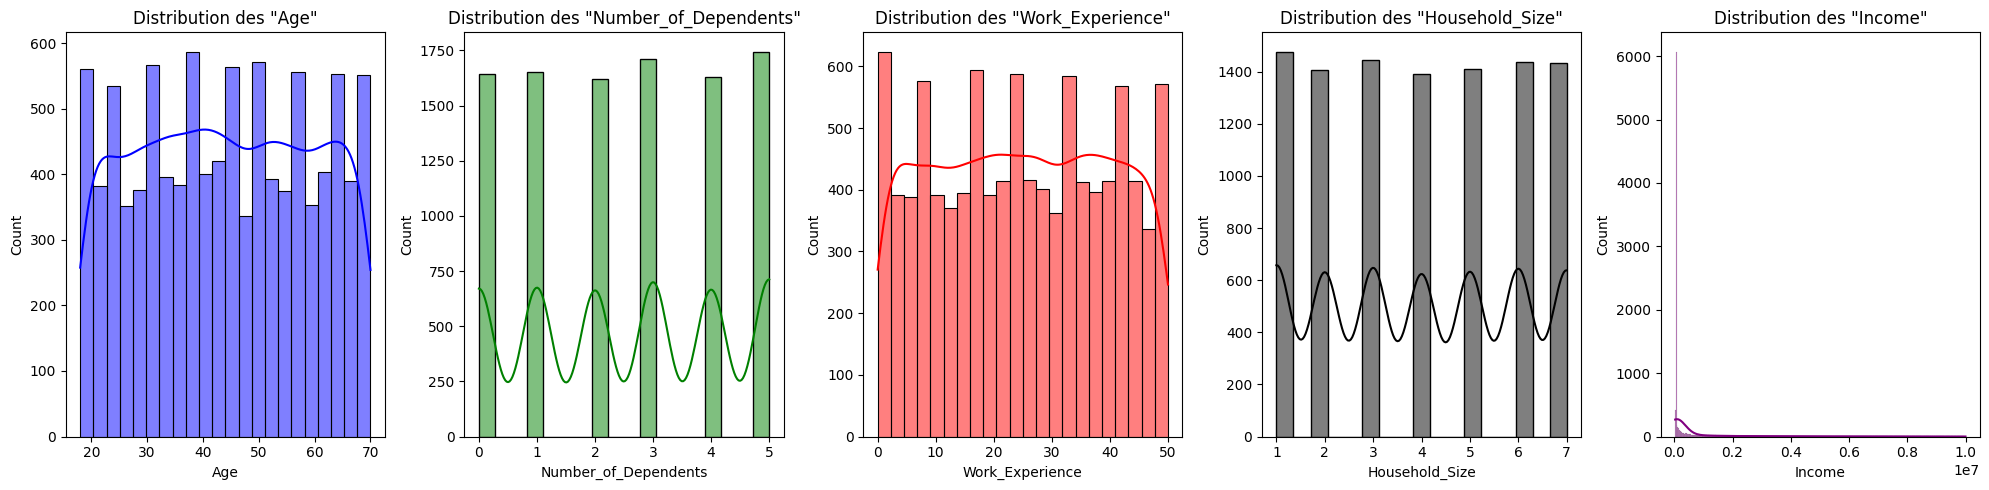

In [15]:
#distribution des variables


# On crée 4 histogrammes pour voir la distribution de chaque colonnes


fig, axs = plt.subplots(1, 5, figsize=(20, 5))  # Définit la taille de la figure

# Histplot pour "Age"
sns.histplot(data['Age'], ax=axs[0], color='blue', kde=True)
axs[0].set_title('Distribution des "Age"')

# Histplot pour "Number_of_Dependents"
sns.histplot(data['Number_of_Dependents'], ax=axs[1], color='green', kde=True)
axs[1].set_title('Distribution des "Number_of_Dependents"')

# Histplot pour "Work_Experience"
sns.histplot(data['Work_Experience'], ax=axs[2], color='red', kde=True)
axs[2].set_title('Distribution des "Work_Experience"')

# Histplot pour "Household_Size"
sns.histplot(data['Household_Size'], ax=axs[3], color='black', kde=True)
axs[3].set_title('Distribution des "Household_Size"')

# Histplot pour "Income"
sns.histplot(data['Income'], ax=axs[4], color='purple', kde=True)
axs[4].set_title('Distribution des "Income"')


plt.tight_layout()  # Ajuste les espacements entre les graphiques
plt.show()

plt.show()


In [16]:
data.corr(numeric_only = True)

,Age,Number_of_Dependents,Work_Experience,Household_Size,Income
Age,1.000000,0.001181,0.000310,0.010565,0.008739
Number_of_Dependents,0.001181,1.000000,-0.000708,-0.006419,0.011413
Work_Experience,0.000310,-0.000708,1.000000,0.006007,-0.027541
Household_Size,0.010565,-0.006419,0.006007,1.000000,-0.011356
Income,0.008739,0.011413,-0.027541,-0.011356,1.000000


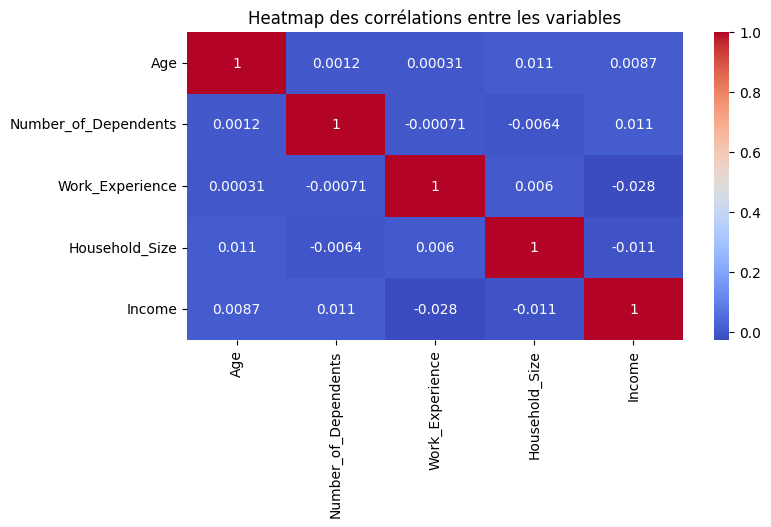

In [17]:
# On créé  une heatmaps de corrélation pour voir la relation entre les variables

plt.figure(figsize=(8,4))

# Sélection des colonnes numériques
numeric_columns = data.select_dtypes(include=["number"])

# Calcul de la matrice de corrélation / ne prend que les colonnes numériques
correlation_matrix = numeric_columns.corr()

# Création de la heatmap
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')

plt.title('Heatmap des corrélations entre les variables')

plt.show()

commentaire:

* les coefficients de corrélation sont proche de 0 ce qui indique que les données n'évoluent pas en parallèle. Quelle que soit la valeur de la première variable, on retrouvera des valeurs différentes.
=> les variables qui ne semblent pas ou très peu corrélées

**TEST : Analyse Approfondie de la variable "Income"**

Focus sur les valeurs aberrantes

In [26]:
data['Income'].value_counts()

,count
Income,
74306,10
71180,7
66950,6
65088,6
68116,6
...,...
65666,1
34310,1
37268,1


In [25]:
data['Income'].max()

9992571

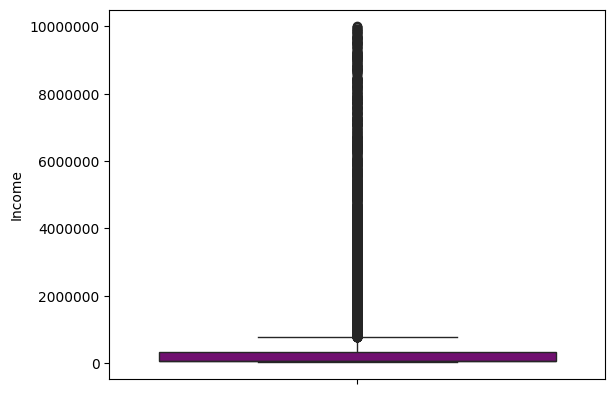

In [19]:
# Boxplot pour "Income"
sns.boxplot(y=data['Income'], color='purple')
plt.ticklabel_format(style='plain', axis='y')  # Applique le format sur l'axe vertical

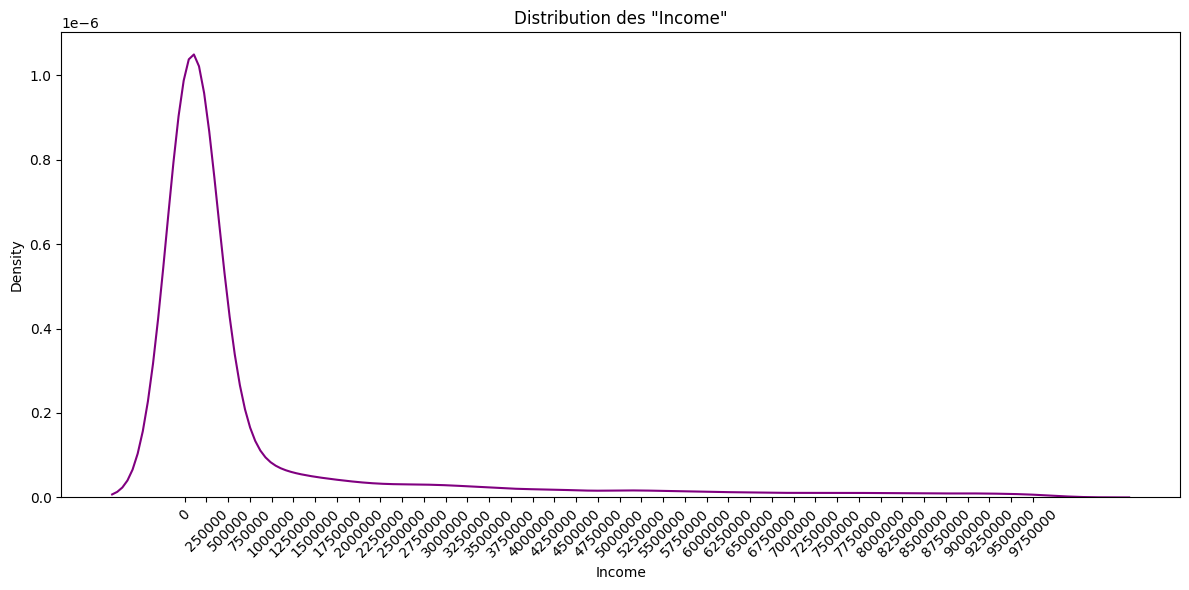

In [20]:
plt.figure(figsize=(12, 6))  # Ajuste la taille du graphique
sns.kdeplot(x=data['Income'], color='purple')
plt.title('Distribution des "Income"')

# Incliner les labels de l'axe X
plt.xticks(rotation=45)

# Empêcher la notation scientifique sur l'axe X
plt.ticklabel_format(style='plain', axis='x')

# Définir l'étendue de l'axe X avec un pas de 350 000
x_ticks = range(0, 10000000, 250000)  # De 0 à 2 millions avec un pas de 350 000
plt.xticks(ticks=x_ticks)


# Afficher le graphique
plt.tight_layout()
plt.show()

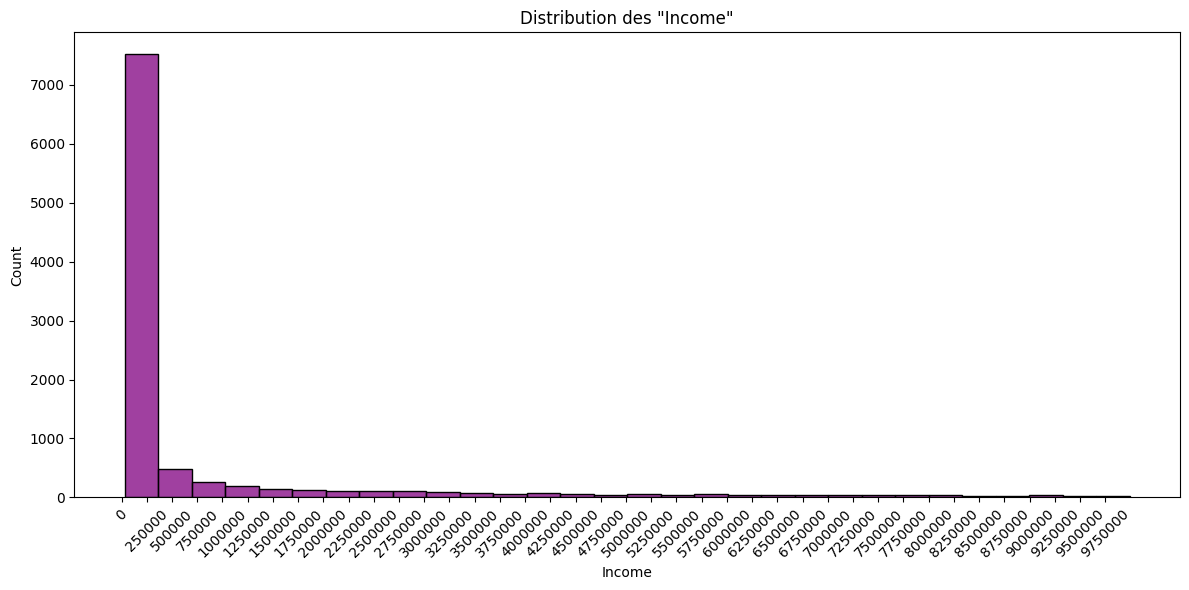

In [21]:
plt.figure(figsize=(12, 6))  # Ajuste la taille du graphique
sns.histplot(data['Income'], color='purple', bins=30)  # Histogramme des revenus avec 30 bacs (bins)
plt.title('Distribution des "Income"')

# Incliner les labels de l'axe X
plt.xticks(rotation=45)

# Empêcher la notation scientifique sur l'axe X
plt.ticklabel_format(style='plain', axis='x')

# Définir l'étendue de l'axe X avec un pas de 250 000
x_ticks = range(0, 10000000, 250000)  # De 0 à 10 millions avec un pas de 250 000
plt.xticks(ticks=x_ticks)

# Afficher le graphique
plt.tight_layout()
plt.show()

Nouvelle dataframe sans les valeurs aberantes (Income > à 250 000)

In [22]:
#nouvelle dataframe sans les valeurs aberantes (Income > à 250 000)

data_trie =data[data['Income'] < 1000000]
data_trie

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,34,Bachelor's,Technology,4,Urban,16,Married,Part-time,1,Own,Townhouse,Male,Biking,71352
9994,49,High School,Healthcare,3,Rural,44,Married,Part-time,3,Own,Apartment,Male,Biking,95134
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676


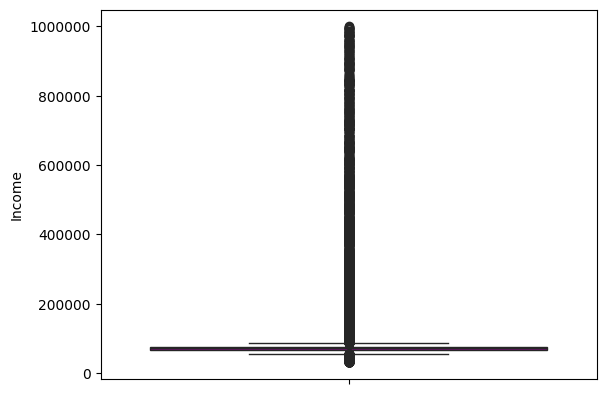

In [23]:
# Boxplot pour "Income"
sns.boxplot(y=data_trie['Income'], color='purple')
plt.ticklabel_format(style='plain', axis='y')  # Applique le format sur l'axe vertical

In [ ]:
#Nombre de ligne à supprimer : 1762 lignes

data[data['Income'] > 1000000].shape

(1762, 14)

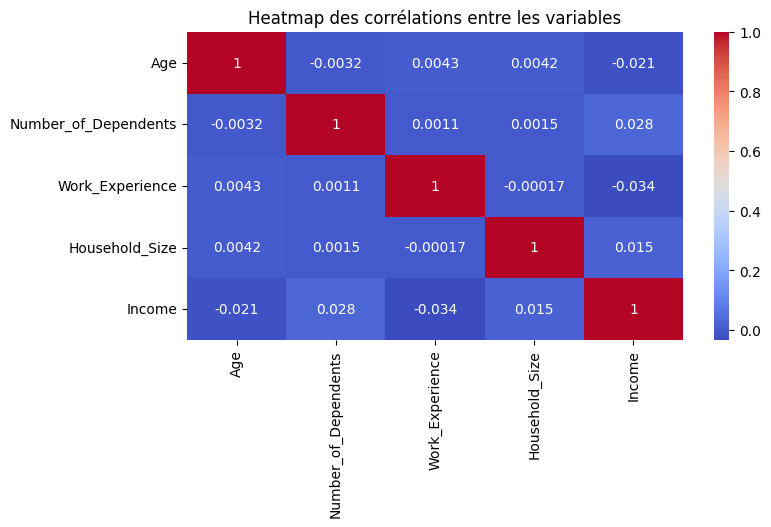

In [ ]:
# On créé  une heatmaps de corrélation pour voir la relation entre les variables

plt.figure(figsize=(8,4))

# Sélection des colonnes numériques
numeric_columns = data_trie.select_dtypes(include=["number"])

# Calcul de la matrice de corrélation / ne prend que les colonnes numériques
correlation_matrix = numeric_columns.corr()

# Création de la heatmap
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')

plt.title('Heatmap des corrélations entre les variables')

plt.show()

commentaire:

* nous n'allons pas supprimer les valeurs aberrantes.

=> avec ce test, nous constatons qu'il y'a une dispersion très importante. En supprimant les outliers, ont perdrait la majeur partie des données.

#**Requête SQL pour répondre aux KPI**





In [24]:
data

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820
9998,44,High School,Education,0,Urban,3,Married,Part-time,1,Own,Single-family home,Male,Biking,57955


In [28]:
#export
export_csv=data.to_csv('data_brut.csv', index=False)
export_csv

In [29]:
import pandas as pd
import sqlite3

# Créer une connexion SQLite en mémoire pour travailler avec le DataFrame
conn = sqlite3.connect(':memory:')

# Charger le DataFrame dans la base de données SQLite (nom de table: 'Household')
data.to_sql('Household', conn, index=False, if_exists='replace')

# Définir une fonction pour exécuter des requêtes SQL sur le DataFrame
def SQL(script):
    return pd.read_sql(script, conn)


**KPI: Revenus annuels par Occupation**

Total des revenus par catégorie professionnelle.

=> Analyser la répartition des revenus en fonction des professions pour mieux comprendre les capacités d’épargne en fonction de l’emploi.

In [32]:
script_sql = """


SELECT Occupation,
      COUNT(Occupation) as nombre_individus,
      MIN(Income) AS revenu_min,
      MAX(Income) AS revenu_max,
      ROUND(AVG(Income),2) as revenu_moyen
FROM household
GROUP BY Occupation
ORDER BY revenu_moyen DESC
;


"""

# Exécuter la requête SQL et afficher le résultat
revenu_per_occupation = SQL(script_sql)
revenu_per_occupation


,Occupation,nombre_individus,revenu_min,revenu_max,revenu_moyen
0,Education,1512,31530,9871131,920816.75
1,Technology,2407,31212,9922858,836173.79
2,Others,1521,31044,9968165,828970.39
3,Healthcare,3035,31137,9992571,799238.76
4,Finance,1525,31199,9829436,706152.67


In [ ]:
#export pour le visuel power BI

export_csv=revenu_per_occupation.to_csv('revenu_per_occupation.csv', index=False)
export_csv

**KPI: Revenus annuels par Education_Level**

Comment le niveau d'éducation influence les salaires ?

In [33]:
script_sql = """

SELECT Education_Level, COUNT(Education_Level) as nombre_individus, MIN(Income) AS revenu_min, MAX(Income) AS revenu_max,
    ROUND(AVG(Income),2) as revenu_moyen
FROM household
GROUP BY Education_Level
ORDER BY revenu_moyen DESC
;


"""

# Exécuter la requête SQL et afficher le résultat
revenu_per_education = SQL(script_sql)
revenu_per_education

,Education_Level,nombre_individus,revenu_min,revenu_max,revenu_moyen
0,High School,2959,31137,9904254,868667.40
1,Bachelor's,4058,31044,9992571,812335.91
2,Master's,2482,31199,9979438,800383.43
3,Doctorate,501,32517,9859518,628710.65


In [ ]:
export_csv=revenu_per_education.to_csv('revenu_per_education.csv', index=False)


**KPI: Homeownership_Status / Analyse des caractéristiques des propriétaires**

In [35]:
script_sql = """

SELECT *
FROM household
WHERE Homeownership_Status = 'Own'
;

"""
own_people = SQL(script_sql)
own_people

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6013,49,High School,Healthcare,3,Rural,44,Married,Part-time,3,Own,Apartment,Male,Biking,95134
6014,58,High School,Others,0,Suburban,26,Divorced,Full-time,6,Own,Townhouse,Female,Car,74994
6015,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676
6016,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820


In [ ]:
export_csv=own_people.to_csv('own_people.csv', index=False)

**KPI: Homeownership_Status / Analyse des caractéristiques des personnes non-propriétaire**

In [34]:
script_sql = """

SELECT *
FROM household
WHERE Homeownership_Status = 'Rent'
;

"""
rent_people = SQL(script_sql)
rent_people

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,25,High School,Others,1,Rural,6,Single,Part-time,1,Rent,Townhouse,Female,Car,73406
1,38,Master's,Technology,3,Rural,20,Married,Full-time,4,Rent,Single-family home,Male,Public transit,3584362
2,28,Bachelor's,Healthcare,4,Urban,50,Married,Full-time,5,Rent,Townhouse,Female,Car,68944
3,53,Master's,Technology,0,Suburban,32,Married,Full-time,3,Rent,Single-family home,Female,Public transit,73964
4,57,Bachelor's,Healthcare,4,Rural,38,Married,Self-employed,6,Rent,Apartment,Male,Car,756798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3977,66,Bachelor's,Technology,5,Urban,5,Single,Full-time,4,Rent,Townhouse,Female,Public transit,212004
3978,52,Bachelor's,Healthcare,3,Urban,7,Married,Full-time,6,Rent,Single-family home,Male,Car,71500
3979,33,Bachelor's,Education,2,Urban,36,Married,Part-time,7,Rent,Apartment,Female,Car,69882
3980,60,Bachelor's,Education,0,Urban,32,Married,Full-time,6,Rent,Townhouse,Male,Walking,68732


In [ ]:
export_csv=rent_people.to_csv('rent_people.csv', index=False)


In [ ]:
data.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

**KPI : Household_Size**

In [37]:
# Modifie la requête SQL dans cette variable
script_sql = """

SELECT
    Household_Size,
    COUNT(*) AS Nombre_Individus,
    SUM(COUNT(*)) OVER () AS Nbe_Individu_Total,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) AS Pourcentage
FROM
    household
GROUP BY
    Household_Size
ORDER BY
    Household_Size;


"""
data_household_Size = SQL(script_sql)
data_household_Size

,Household_Size,Nombre_Individus,Nbe_Individu_Total,Pourcentage
0,1,1477,10000,14.77
1,2,1406,10000,14.06
2,3,1445,10000,14.45
3,4,1391,10000,13.91
4,5,1411,10000,14.11
5,6,1437,10000,14.37
6,7,1433,10000,14.33


**KPI: Segmentation / classification par tranche d'age**

In [41]:
script_sql = """

SELECT age_Bucket, Age, Gender, Occupation, Income, Marital_Status, Employment_Status, Homeownership_Status, Type_of_Housing,
      COUNT("Income") OVER (PARTITION BY age_Bucket) AS nb_individu_per_cat,
      ROUND(AVG("Income") OVER (PARTITION BY age_Bucket, Occupation), 0) AS Average_budget_per_cat,
      ROUND(AVG("Household_Size") OVER (PARTITION BY age_Bucket), 0) AS Average_homesize_per_cat,
      ROUND(AVG("Work_Experience") OVER (PARTITION BY age_Bucket), 0) AS Average_workexp_per_cat
FROM (
      SELECT Age, Gender, Occupation, Number_of_Dependents, Location, Work_Experience, Marital_Status, Employment_Status, Household_Size,
          Homeownership_Status, Type_of_Housing, Income,
           CASE
               WHEN h.Age > 17 AND h.Age <= 30 THEN '18 - 30'
               WHEN h.Age > 30 AND h.Age <= 45 THEN '30 - 45'
               WHEN h.Age > 45 AND h.Age <= 55 THEN '45 - 55'
               WHEN h.Age > 55 AND h.Age <= 60 THEN '55 - 60'
               WHEN h.Age > 60 AND h.Age <= 70 THEN '60 - 70'
               ELSE '> 70'
           END AS age_Bucket
      FROM household AS h ) AS Bucket_age
ORDER BY age_Bucket
;

"""
age_bucket = SQL(script_sql)
age_bucket

,age_Bucket,Age,Gender,Occupation,Income,Marital_Status,Employment_Status,Homeownership_Status,Type_of_Housing,nb_individu_per_cat,Average_budget_per_cat,Average_homesize_per_cat,Average_workexp_per_cat
0,18 - 30,21,Female,Education,1248886,Married,Part-time,Own,Apartment,2403,920918.0,4.0,25.0
1,18 - 30,26,Female,Education,74042,Married,Part-time,Rent,Single-family home,2403,920918.0,4.0,25.0
2,18 - 30,21,Male,Education,66784,Married,Full-time,Own,Apartment,2403,920918.0,4.0,25.0
3,18 - 30,21,Female,Education,180722,Single,Part-time,Own,Townhouse,2403,920918.0,4.0,25.0
4,18 - 30,27,Male,Education,66480,Single,Self-employed,Own,Single-family home,2403,920918.0,4.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,60 - 70,65,Male,Technology,70094,Married,Part-time,Own,Apartment,1898,795420.0,4.0,25.0
9996,60 - 70,70,Male,Technology,51169,Single,Part-time,Own,Single-family home,1898,795420.0,4.0,25.0
9997,60 - 70,67,Female,Technology,67918,Single,Full-time,Own,Townhouse,1898,795420.0,4.0,25.0
9998,60 - 70,66,Female,Technology,70430,Single,Self-employed,Rent,Single-family home,1898,795420.0,4.0,25.0


In [ ]:
export_csv=age_bucket.to_csv('agebucket.csv', index=False)
export_csv

**KPI: Catégorie / classification des salaires**

In [43]:
script_sql = """

SELECT Budget_Bucket_$, Income , Occupation, Homeownership_Status, Type_of_Housing, Marital_Status, Employment_Status, Household_Size,
       COUNT("Income") OVER (PARTITION BY Budget_Bucket_$) AS nb_individu_per_cat,
       ROUND(AVG("Income") OVER (PARTITION BY Budget_Bucket_$), 0) AS Average_budget_per_cat,
       ROUND(AVG("Age") OVER (PARTITION BY Budget_Bucket_$), 0) AS Average_age_per_cat,
       ROUND(AVG("Work_Experience") OVER (PARTITION BY Budget_Bucket_$), 0) AS Average_work_per_cat
FROM (
    SELECT Age, Occupation, Number_of_Dependents, Location, Work_Experience, Marital_Status, Employment_Status, Household_Size,
          Homeownership_Status, Type_of_Housing, Income,
           CASE
               WHEN h.Income > 0 AND h.Income <= 100 THEN '1$ - 100$'
               WHEN h.Income > 100 AND h.Income <= 10000 THEN '100$ - 10K$'
               WHEN h.Income > 10000 AND h.Income <= 100000 THEN '10K$ - 100K$'
               WHEN h.Income > 100000 AND h.Income <= 1000000 THEN '100k$ - 1000K$'
               WHEN h.Income > 1000000 AND h.Income <= 10000000 THEN '1000K$ - 10000K$'
               ELSE '> 10000K$'
           END AS Budget_Bucket_$
    FROM household AS h ) AS Bucket_Budget_$
ORDER BY Occupation;

"""
income_bucket = SQL(script_sql)
income_bucket

,Budget_Bucket_$,Income,Occupation,Homeownership_Status,Type_of_Housing,Marital_Status,Employment_Status,Household_Size,nb_individu_per_cat,Average_budget_per_cat,Average_age_per_cat,Average_work_per_cat
0,1000K$ - 10000K$,5188124,Education,Own,Apartment,Married,Full-time,6,1762,4020957.0,44.0,24.0
1,1000K$ - 10000K$,6252651,Education,Own,Apartment,Single,Full-time,5,1762,4020957.0,44.0,24.0
2,1000K$ - 10000K$,1248886,Education,Own,Apartment,Married,Part-time,4,1762,4020957.0,44.0,24.0
3,1000K$ - 10000K$,9061674,Education,Own,Apartment,Married,Part-time,7,1762,4020957.0,44.0,24.0
4,1000K$ - 10000K$,5227297,Education,Own,Apartment,Married,Full-time,4,1762,4020957.0,44.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10K$ - 100K$,71244,Technology,Own,Townhouse,Single,Part-time,3,6613,68816.0,44.0,25.0
9996,10K$ - 100K$,74368,Technology,Rent,Single-family home,Married,Full-time,4,6613,68816.0,44.0,25.0
9997,10K$ - 100K$,72490,Technology,Own,Apartment,Married,Full-time,3,6613,68816.0,44.0,25.0
9998,10K$ - 100K$,71352,Technology,Own,Townhouse,Married,Part-time,1,6613,68816.0,44.0,25.0


In [ ]:
export_csv=income_bucket.to_csv('incomebucket.csv', index=False)
export_csv